In [220]:
import pandas as pd

In [221]:
df = pd.read_csv('data.csv.gz')

In [222]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,0,0,0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,1,1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,2,2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,3,3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,4,4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [223]:
from pandas.api.types import CategoricalDtype


dfc = df

dfc['Income'] = dfc['Income'] == ' <=50K'

categorical_columns = [
    "WorkClass", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "HoursPerWeek", "NativeCountry", "Income"
]

for column in categorical_columns:
    dfc[column] = dfc[column].astype(CategoricalDtype(ordered=True))
    dfc[column] = dfc[column].cat.codes
    


In [224]:
X = df.drop('Income', axis=1)
Y = df['Income']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, stratify=Y, random_state=10,
)

In [225]:

#Support Vector Machine Based Classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from collections import defaultdict

scores = defaultdict(dict)

classifiers = {
    'logistic-regression' : LogisticRegression,
    'k-nearest-neighbors' : KNeighborsClassifier,
    'decision-tree' : DecisionTreeClassifier,
    'gaussian-nb' : GaussianNB
    
}

In [226]:
clf = LogisticRegression()

In [227]:
clf.fit(X_train, Y_train)

/home/andreas/projects/geordi/algoneer/algoneer/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
from sklearn.metrics import accuracy_score, confusion_matrix

Y_pred_test = clf.predict(X_test) == Y_test

print(accuracy_score(Y_pred_test, Y_test))

0.900380788600909


## Partial Dependence Plot

To make a partial dependence plot for a given feature, we implement the following algorithm:

* If the feature is categorical, we generate a list of all possible feature values.
* If the features is numerical, we generate a list of values spanning the valid range of the feature
* For each value from the list of values, we calculate the average prediction value (for regression) or the class frequencies (for classification) over all datapoints in the dataset.
* We plot the resulting value as a function of the feature value.

In [231]:
def pdp_categorical(X, model, column):
    """
    Generate the partial dependence
    """
    values = X[column]
    uniques = values.unique()
    YS = []
    for v in uniques:
        NX = X.copy()
        NX[column] = v
        Y = clf.predict(NX)
        YS.append(sum(Y)/len(Y))
    return uniques, sorted(YS)

In [230]:
x, pdv = pdp_categorical(X_test, clf, "HoursPerWeek")

In [212]:
import matplotlib.pylab as pl

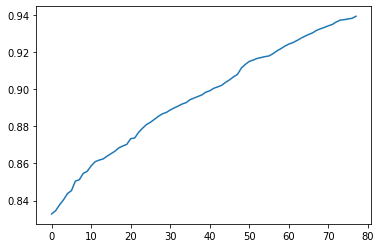

In [213]:
pl.plot(pdv)